In [11]:
import numpy as np
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

On peut détecter une **multi-colinéarité élevée** en inspectant les **valeurs propres** de la **matrice de corrélation** .</br>

Une **valeur propre très faible** montre que **les données** sont **colinéaires** et le **vecteur propre** correspondant montre **quelles variables** sont **colinéaires**.

S'il n'y a **pas de colinéarité** dans les données, vous vous attendez à ce qu'**aucune des valeurs propres ne soit proche de zéro** :

In [2]:
xs = np.random.randn(100, 5)      # independent variables
corr = np.corrcoef(xs, rowvar=0)  # correlation matrix
w, v = np.linalg.eig(corr)        # eigen values & eigen vectors
w

array([1.25035526, 1.16360646, 0.96242211, 0.83303485, 0.79058131])

 si `x[4] - 2 * x[0] - 3 * x[2] = 0`, alors :

In [3]:
noise = np.random.randn(100)                      # white noise
xs[:,4] = 2 * xs[:,0] + 3 * xs[:,2] + .5 * noise  # collinearity
corr = np.corrcoef(xs, rowvar=0)
w, v = np.linalg.eig(corr)
w

array([2.13920931, 0.00789703, 0.83317357, 0.96395779, 1.0557623 ])

l'une des **valeurs propres** (ici la deuxième), est **proche de zéro**. Le **vecteur propre** correspondant est :

In [4]:
v[:,1]

array([-0.40198747, -0.0070834 , -0.55639467, -0.00220252,  0.72716987])

Ignorant les coefficients presque nuls , `x[0]`, `x[2]` et `x[4]` sont **colinéaires** (comme prévu).</br>

Si l'on **normalise** les **valeurs de `xs`** et que l'on multiplie par ce **vecteur propre**, le résultat oscillera **autour de zéro avec une petite variance** 

In [6]:
std_xs = (xs - xs.mean(axis=0)) / xs.std(axis=0)  # standardized values
ys = std_xs.dot(v[:,1])
ys.mean(), ys.var()

(-2.1371793224034264e-17, 0.00789703035618233)

Notez que `ys.var()` c'est essentiellement la **valeur propre qui était proche de zéro**.

Ainsi, afin de capturer une **multi-linéarité élevée**, regardez les **valeurs propres de la matrice de corrélation**.

### Methode VIF : Variance Inflation Factor

En statistique , le facteur d'inflation de la variance ( VIF ) est le rapport ( quotient ) de la variance de l'estimation d'un paramètre dans un modèle qui comprend plusieurs autres termes (paramètres) par la variance d'un modèle construit à l'aide d'un seul terme. [1] Il quantifie la sévérité de la multicolinéarité dans une analyse de régression des moindres carrés ordinaires. Il fournit un indice qui mesure dans quelle mesure la variance (le carré de l' écart type de l'estimation) d'un coefficient de régression estimé est augmentée en raison de la colinéarité.

In [1]:
cd C:\Users\david\STATISTIQUES\Fonctions utils\datasets

C:\Users\david\STATISTIQUES\Fonctions utils\datasets


In [2]:
pwd

'C:\\Users\\david\\STATISTIQUES\\Fonctions utils\\datasets'

In [5]:
bmi = pd.read_csv('BMI.csv')
bmi.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


In [6]:
bmi.Gender = bmi.Gender.map({'Male' : 0, 'Female' : 1})

In [7]:
bmi.head()

,Gender,Height,Weight,Index
0,0,174,96,4
1,0,189,87,2
2,1,185,110,4
3,1,195,104,3
4,0,149,61,3


In [8]:
X = bmi[['Gender', 'Height', 'Weight']]
y = bmi.Index

In [9]:
vif_data = pd.DataFrame()
vif_data['Features'] = X.columns
vif_data.head()

,Features
0,Gender
1,Height
2,Weight


Calculons VIF pour chaque feature

In [12]:
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
vif_data

,Features,VIF
0,Gender,2.028864
1,Height,11.623103
2,Weight,10.688377


la taille et le poids ont des valeurs très élevées de VIF, indiquant que ces deux variables sont fortement corrélées. Ceci est attendu car la taille d'une personne influence son poids. Par conséquent, considérer ces deux caractéristiques ensemble conduit à un modèle à forte multicolinéarité.

In [13]:
X.values

array([[  0, 174,  96],
       [  0, 189,  87],
       [  1, 185, 110],
       ...,
       [  1, 141, 136],
       [  0, 150,  95],
       [  0, 173, 131]], dtype=int64)

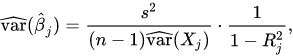